<div style="text-align:left;font-size:2em"><span style="font-weight:bolder;font-size:1.25em">SP2273 | Learning Portfolio</span><br><br><span style="font-weight:bold;color:darkred">Numerical Solutions (Need)</span></div>

## 1 A Bucket of water

### 1.1 Getting a feel

Text(0.5, 0, 'Time(mins)')

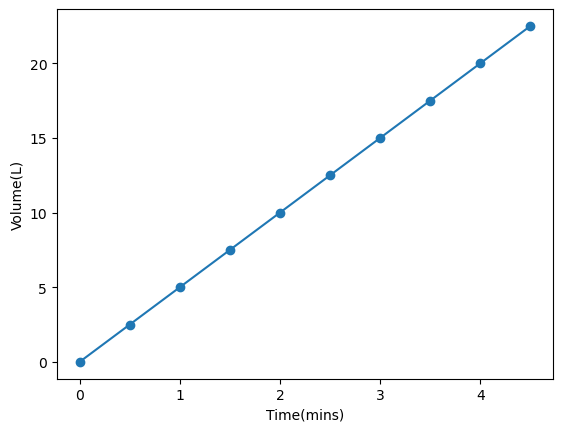

In [4]:
import matplotlib.pyplot as plt
max_time = 5                     # Maximum time (mins)
dt = .5                          # Time step (mins)
rate = 5                         # Rate (L/min)
all_volume = []                  # To keep track of all volumes
volume = 0                       # Starting volume

all_time = np.arange(start=0, stop=max_time, step=dt)

for time in all_time:
    all_volume.append(volume)    # Record volume
    dV = rate * dt               # Calculate change in volume
    volume += dV                 # Update the new volume

# Because we can...
plt.plot(all_time, all_volume,marker='o') #want to see each point
plt.ylabel('Volume(L)')
plt.xlabel('Time(mins)')

### 1.2 An overflowing bucket

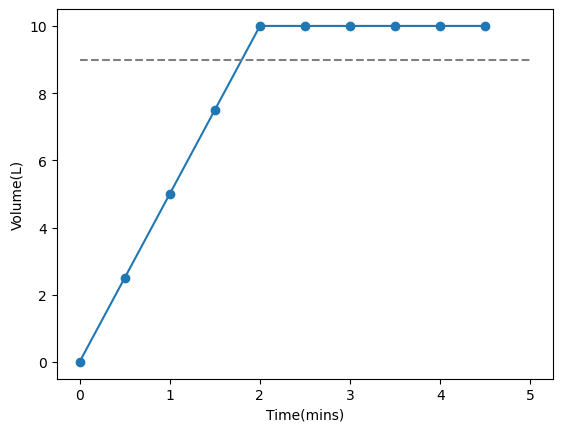

In [6]:
all_volume = []                  # To keep track of all volumes
volume = 0                       # Starting volume

all_time = np.arange(start=0, stop=max_time, step=dt)

for time in all_time:
    all_volume.append(volume)
    dV = rate * dt
    if volume <= bucket_capacity:
        volume += dV             # Update the new volume

plt.plot(all_time, all_volume, marker = 'o')
plt.ylabel('Volume(L)')
plt.xlabel('Time(mins)')
plt.hlines(bucket_capacity, 0, max_time, colors='grey', ls='dashed')

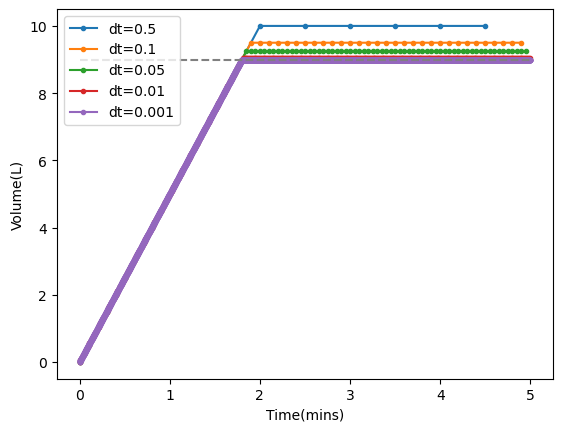

In [12]:
for dt in [0.5, 0.1, 0.05, 0.01, 0.001]:
    all_volume = []                  # To keep track of all volumes
    volume = 0                       # Starting volume

    all_time = np.arange(start=0, stop=max_time, step=dt)

    for time in all_time:
        all_volume.append(volume)
        dV = rate * dt
        if volume <= bucket_capacity:
            volume += dV

    plt.plot(all_time, all_volume, label=f'dt={dt}',marker='.')

plt.ylabel('Volume(L)')
plt.xlabel('Time(mins)')
plt.hlines(bucket_capacity, 0, max_time, colors='grey', ls='dashed')
plt.legend()

### 1.3 A leaky bucket

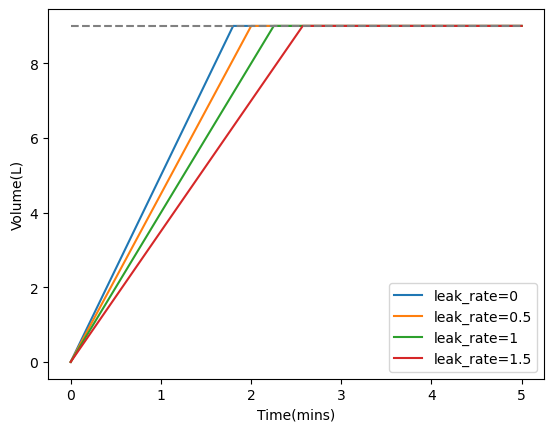

In [16]:
#trying to avoid redefining variables as far as possible

dt = .0001                           # leak rate
for leak_rate in [0,0.5,1,1.5]:
    all_volume = []                  # To keep track of all volumes
    volume = 0                       # Starting volume

    all_time = np.arange(start=0, stop=max_time, step=dt)

    for time in all_time:
        all_volume.append(volume)

        dV = rate * dt
        leak_volume = leak_rate * dt
        volume -= leak_volume

        if volume <= bucket_capacity:
            volume += dV             # Update the new volume

    plt.plot(all_time, all_volume, label=f'leak_rate={leak_rate}')

plt.ylabel('Volume(L)')
plt.xlabel('Time(mins)')
plt.hlines(bucket_capacity, 0, max_time, colors='grey', ls='dashed')
plt.legend()

### 1.4 Let’s turn off the tap

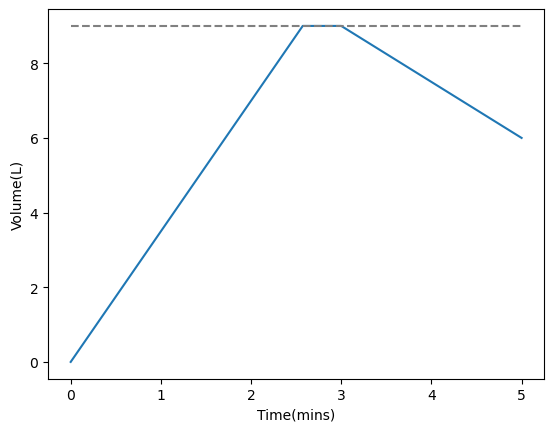

In [18]:
tap_off_time = 3                 # When the tap goes off
leak_rate = 1.5                  # L/min
all_volume = []                  # To keep track of all volumes
volume = 0                       # Starting volume

all_time = np.arange(start=0, stop=max_time, step=dt)

for time in all_time:
    all_volume.append(volume)
    dV = rate * dt

    leak_volume = leak_rate * dt
    volume -= leak_volume

    if (volume <= bucket_capacity) and (time < tap_off_time):
        volume += dV             

plt.plot(all_time, all_volume)
plt.ylabel('Volume(L)')
plt.xlabel('Time(mins)')
plt.hlines(bucket_capacity, 0, max_time, colors='grey', ls='dashed')

### Using while

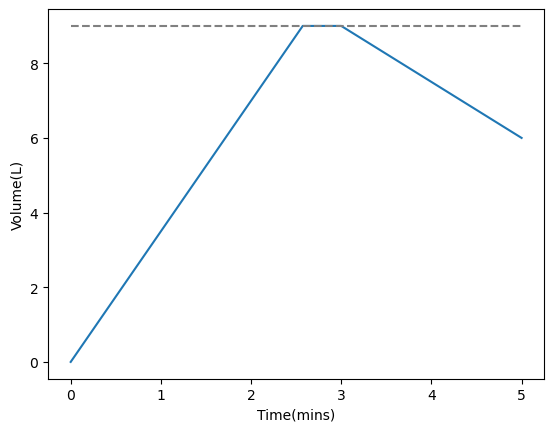

In [20]:
max_time = 5                     # Maximum time (mins)
all_volume = []                  # To keep track of all volumes
all_time = []                    # To keep track of all times
volume = 0                       # Starting volume
time = 0

while time <= max_time:
    all_time.append(time)
    all_volume.append(volume)
    dV = rate * dt

    leak_volume = leak_rate * dt
    volume -= leak_volume

    if (volume <= bucket_capacity) and (time < tap_off_time):
        volume += dV    

    time += dt             

plt.plot(all_time, all_volume)
plt.ylabel('Volume(L)')
plt.xlabel('Time(mins)')
plt.hlines(bucket_capacity, 0, max_time, colors='grey', ls='dashed')

### 1.5 A quick summary

1. Establish a relationship that connects the changes of the variables.
2. Pick a starting value
3. Take a step, and calculate the changes.
4. Update the variables
5. Keep on going until you have the desired number of points.
6. If you want to improve accuracy, take smaller steps.

### 1.6 We just solved a differential equation!

 We have a simple DE:
 $${\frac{dV}{dT}=R}$$
 which is approximated by:
 $${\frac{\Delta V}{\Delta t} \approx \frac{dV}{dT}=R}$$

## 2 Simulating Radioactivity

### 2.1 Introduction

### 2.2 Approximating the differential equation

$${\frac{\Delta N}{\Delta t} \approx \frac{dN}{dT}=-\lambda N}$$
$${\Rightarrow \Delta N \approx -\lambda N \Delta t}$$

### 2.3 Getting a feel

### 2.4 Let’s write some code

Text(0.5, 0, 'Time(Millions of years)')

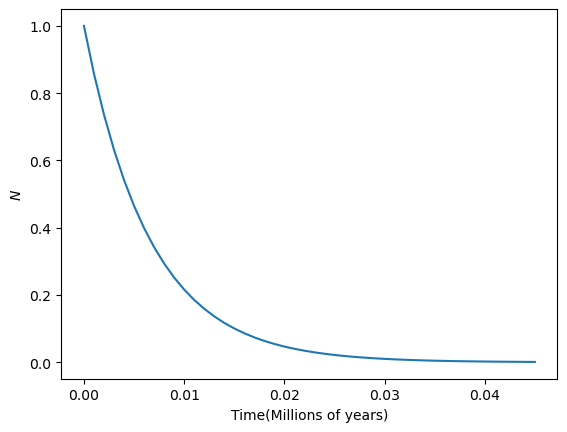

In [23]:
decay_constant = 142       # For 85 Rb (per Myr)
stop_fraction = 1E-3       # stop when the sample has shrunk to
                           # this fraction of the starting value
N0 = 1                     # Starting value of N (in billions of atoms)
dt = .001
time, N = 0, N0            # Starting values

all_N, all_time = [], []

while True:
    all_time.append(time)
    all_N.append(N)

    dN = -decay_constant*N*dt
    N += dN

    if N < N0*stop_fraction:
        break

    time += dt


plt.plot(all_time, all_N)
plt.ylabel('$N$')
plt.xlabel('Time(Millions of years)')

### 2.5 Some things to note about the code

``break`` is useful if you want multiple stop conditions in a while loop

### 2.6 A quick summary

1. Rewrite the equation in an approximate form that connects the changes of one variable to another.
2. Pick starting values for the variables.
3. Step the control variable (time in the previous case) and calculate the corresponding changes in the other variables.
4. Update the variables
5. Repeat until you reach the desired end.
6. Make the step size smaller if you want greater accuracy.

## Exercise 1 :  A more realistic leak

Text(0.5, 0, 'Time(mins)')

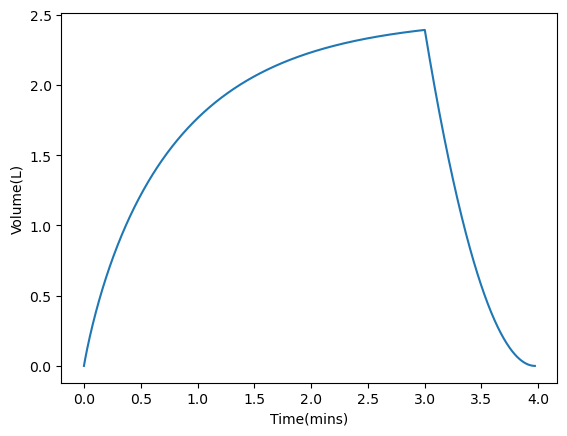

In [101]:
import math
tap_off_time = 3                 # When the tap goes off
max_time = 5                     # Maximum time (mins)
dt = .001                        # Time step (mins)
rate = 5                         # Filling rate (L/min)
base_area  = 700 * 10**-4        # m2
leak_area = 10**-4               # m2
                                                                #h = volume (L) * 10^-3 / base_area
leak_rate = lambda volume: 10**3 * 60 * leak_area * math.sqrt(2*9.8*volume * 10**-3/ base_area) #area (m2) * 10^3 * 60 speed (m3/s) = (L/min)
bucket_capacity = 9              # L
all_volume = []                  # To keep track of all volumes
all_time = []                    # To keep track of all times
volume = 0                       # Starting volume
time = 0

while time <= max_time:
    
    all_time.append(time)
    all_volume.append(volume)
    dV = rate * dt
    leak_volume = leak_rate(volume) * dt
    if volume<leak_volume:
        break
    volume -= leak_volume
    if (volume <= bucket_capacity) and (time < tap_off_time):
        volume += dV 
    time += dt

plt.plot(all_time, all_volume)
plt.ylabel('Volume(L)')
plt.xlabel('Time(mins)')

$${-dV/dt = 6\sqrt{2(9.81)V/0.07} > V?}$$